Course-End Project: Healthcare


Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

Dataset description:


Variable	Description
Age	Age in years
Sex	1 = male; 0 = female
cp|	Chest pain type
trestbps	Resting blood pressure (in mm Hg on admission to the hospital)
chol	Serum cholesterol in mg/dl
fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg	Resting electrocardiographic results
thalach	Maximum heart rate achieved
exang	Exercise induced angina (1 = yes; 0 = no)
oldpeak	ST depression induced by exercise relative to rest
slope	Slope of the peak exercise ST segment
ca	Number of major vessels (0-3) colored by fluoroscopy
thal	3 = normal; 6 = fixed defect; 7 = reversible defect
Target	1 or 0



Note:

Download CEP 1_ Dataset.xlsx using the link given in the Healthcare project problem statement




Task to be performed:
1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
c.	Study the occurrence of CVD across the Age category
d.	Study the composition of all patients with respect to the Sex category
e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
f.	Describe the relationship between cholesterol levels and a target variable
g.	State what relationship exists between peak exercising and the occurrence of a heart attack
h.	Check if thalassemia is a major cause of CVD
i.	List how the other factors determine the occurrence of CVD
j.	Use a pair plot to understand the relationship between all the given variables
3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing data set 
hc_df = pd.read_excel('1645792390_cep1_dataset.xlsx')
print(type(hc_df))
# Checking Sample of the data set
hc_df.sample(10)

<class 'pandas.core.frame.DataFrame'>


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [3]:
#Checking the shape of  dataset & the null values 
print(hc_df.shape)
hc_df.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
hc_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
hc_df[hc_df.duplicated() == 'True']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [6]:
#preliminary statistical summary
hc_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Seprating Categorical , Numerical Columns
catergorical_var=[]
continous_var=[]
for column in hc_df.columns:
    if len(hc_df[column].unique())<=8:
        
        catergorical_var.append(column)
    else:
        continous_var.append(column)
        

In [8]:
catergorical_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
continous_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
import seaborn as sns

## Study the occurrence of CVD across the Age category

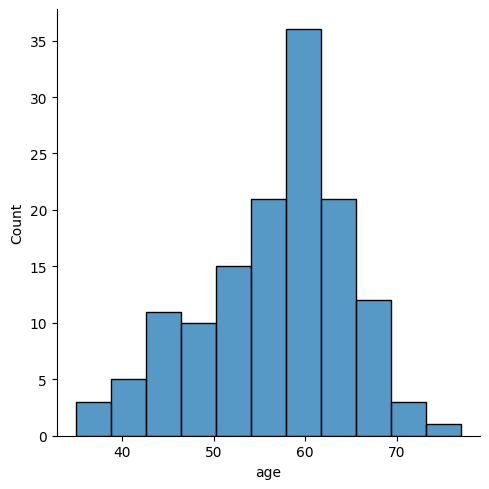

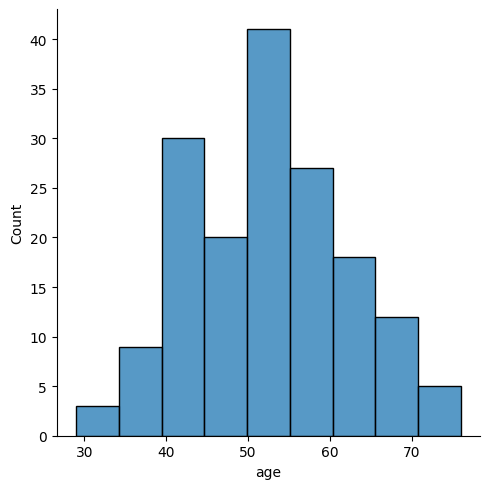

In [11]:
sns.displot(hc_df[hc_df['target']==0]['age'],);
sns.displot(hc_df[hc_df['target']==1]['age']);

## Study the composition of all patients with respect to the Sex category

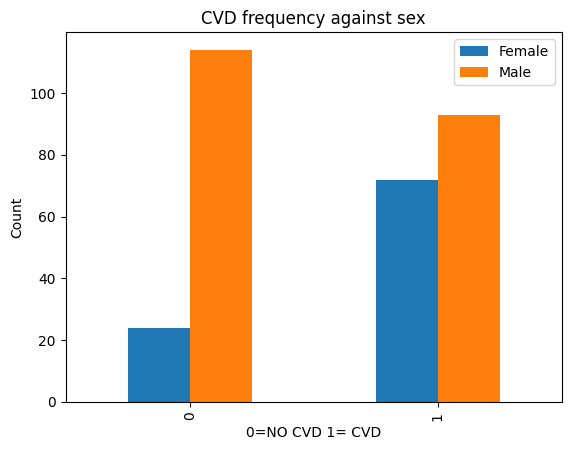

In [12]:
pd.crosstab(hc_df.target,hc_df.sex).plot(kind='bar')
plt.title("CVD frequency against sex")
plt.xlabel("0=NO CVD 1= CVD")
plt.ylabel('Count')
plt.legend(['Female','Male'])

## Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [13]:
#grp=hc_df.groupby(['target','trestbps'])['target'].size().plot(kind='bar',color='Red',figsize=(20,5))
# seprating dataset w.r.t to target column
cvd_true = hc_df.loc[hc_df['target']==1]
cvd_false = hc_df.loc[hc_df['target']==0]

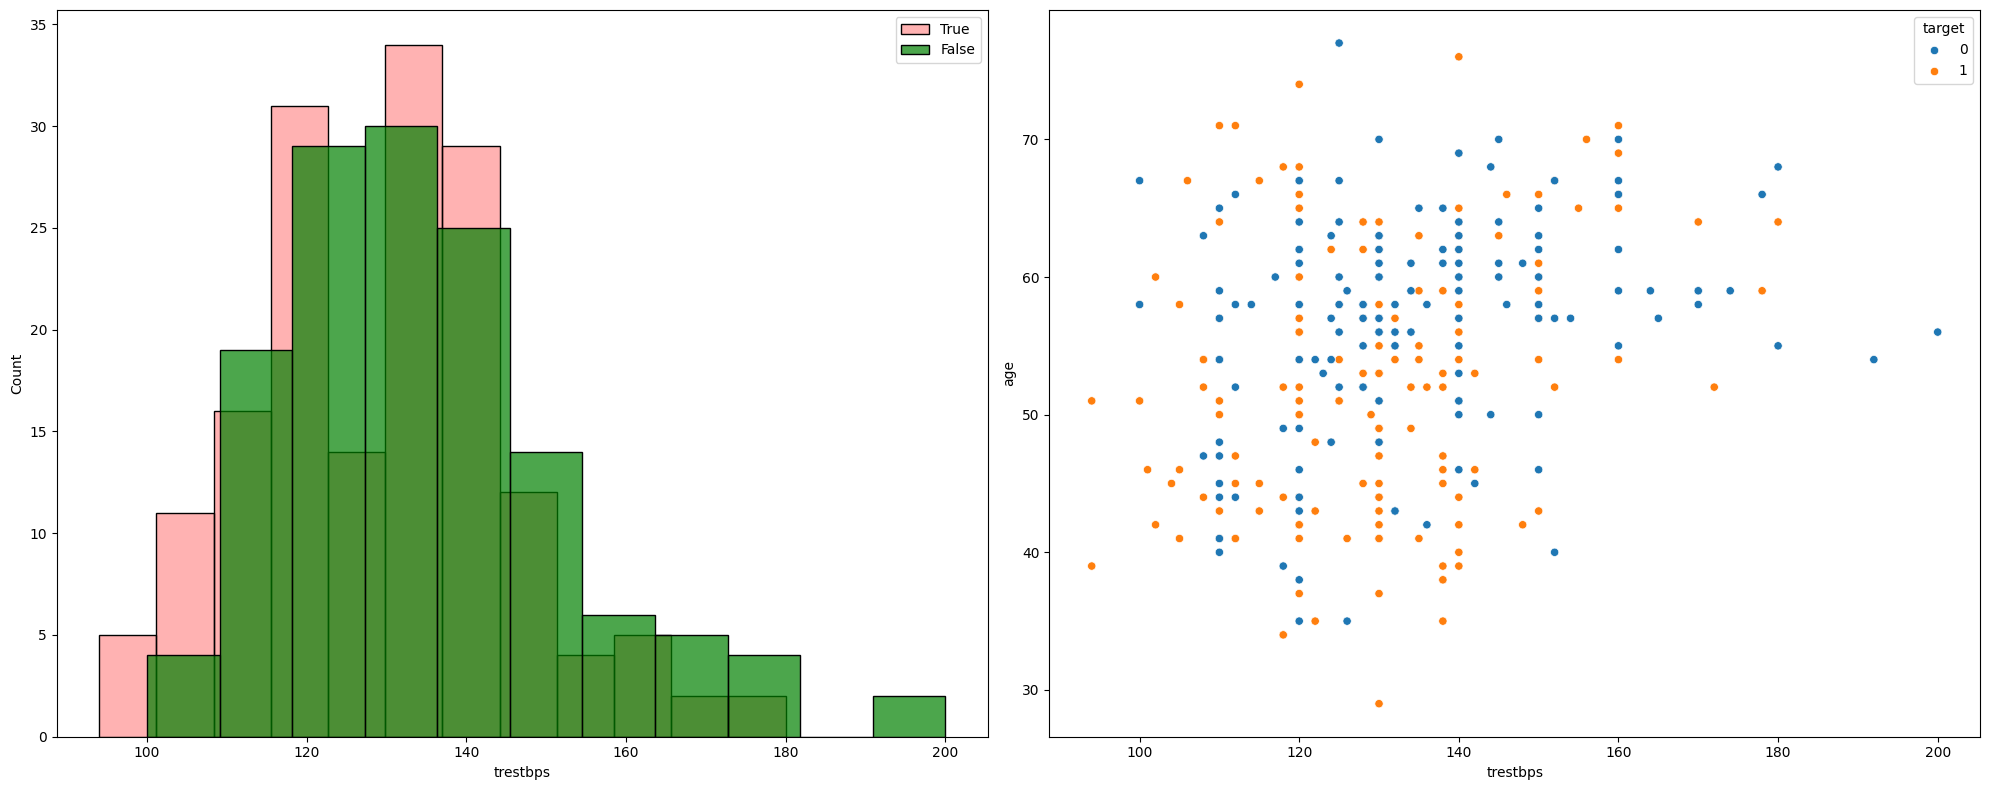

<Axes: xlabel='trestbps', ylabel='count'>

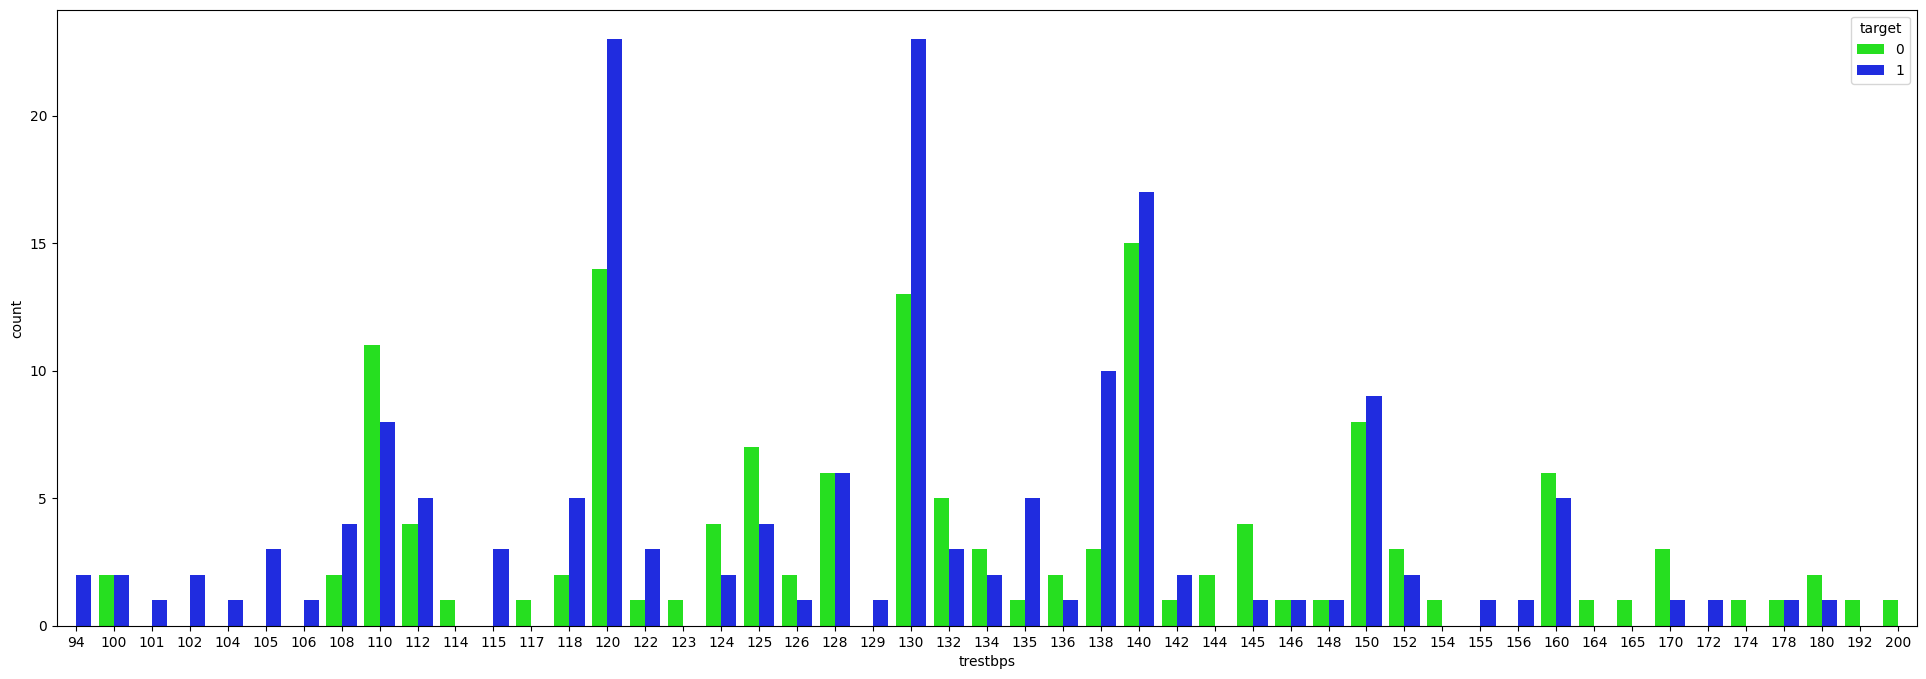

In [14]:
plt.figure(figsize=(20,8))
#plotting histplot to see the distibrution of CVD on trestbps 
plt.subplot(1,2,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3,label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.7,label='False')
plt.legend()

#plotting scatter plot to compare age wise trestps on CVD cases
plt.subplot(1,2,2)
sns.scatterplot(x=hc_df.trestbps,y=hc_df.age,hue=hc_df.target)
plt.tight_layout()
plt.show()

#plotting countplot for checking how many CVD occurs at trestbps counts
plt.figure(figsize=(24,8))
sns.countplot(x='trestbps',hue='target',data=hc_df,palette='hsv')

## Describe the relationship between cholesterol levels and a target variable

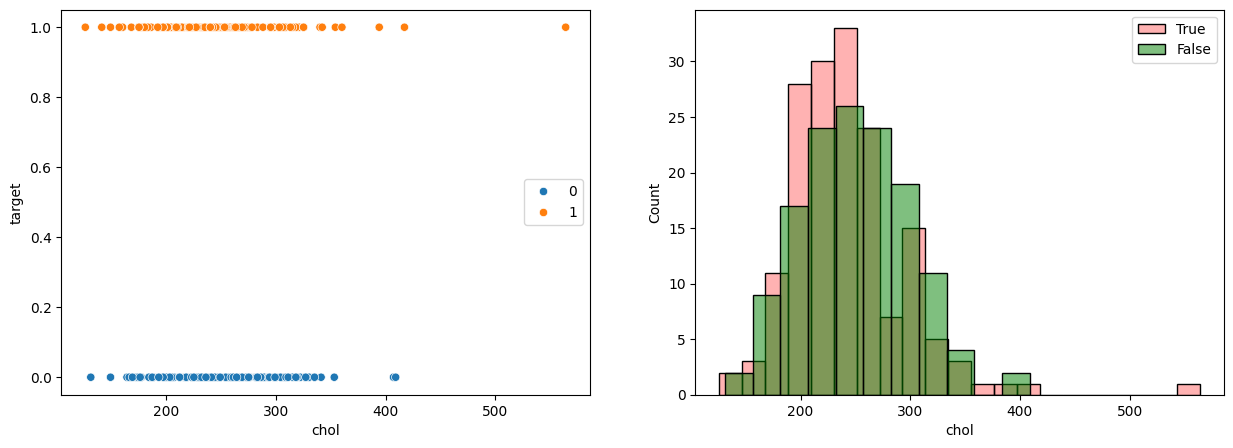

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=hc_df.chol,y=hc_df.target,hue=hc_df.target)
plt.legend(loc='center right')

plt.subplot(1,2,2)
sns.histplot(x=cvd_true.chol,color='r',alpha=0.3,label=True)
sns.histplot(x=cvd_false.chol,color='g',alpha=0.5,label=False)
plt.legend()

 ### As per the above Charts ,we observe the people who develop CVD have much higher level of cholestrol sometimes and most are concentrated in the range of 200 - 300

## State what relationship exists between peak exercising and the occurrence of a heart attack

<Axes: xlabel='slope', ylabel='oldpeak'>

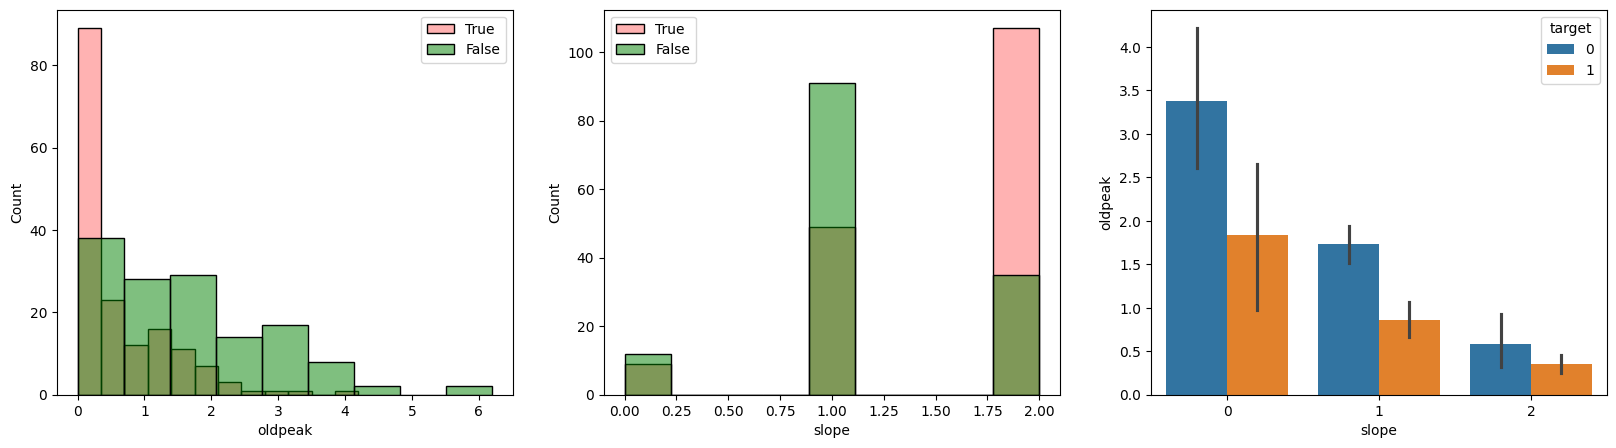

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=cvd_true.oldpeak,color='red',alpha=0.3,label='True')
sns.histplot(x=cvd_false.oldpeak,color='green',alpha=0.5, label='False')
plt.legend()
plt.subplot(1,3,2)
sns.histplot(x=cvd_true.slope,color='red',alpha=0.3,label='True')
sns.histplot(x=cvd_false.slope,color='green',alpha=0.5,label='False')
plt.legend()
plt.subplot(133)
sns.barplot(x=hc_df.slope,y=hc_df.oldpeak,hue=hc_df.target)

### As per the above Charts Shows , oldpeak is lower in people who developed CVD, slope: 2 was highest

### Check if thalassemia is a major cause of CVD

In [17]:
hc_df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [18]:
hc_df.groupby(['thal','target']).size() # 4 unique Values in thal variable

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         130
3     0          89
      1          28
dtype: int64

thal
2    130
3     28
1      6
0      1
Name: count, dtype: int64

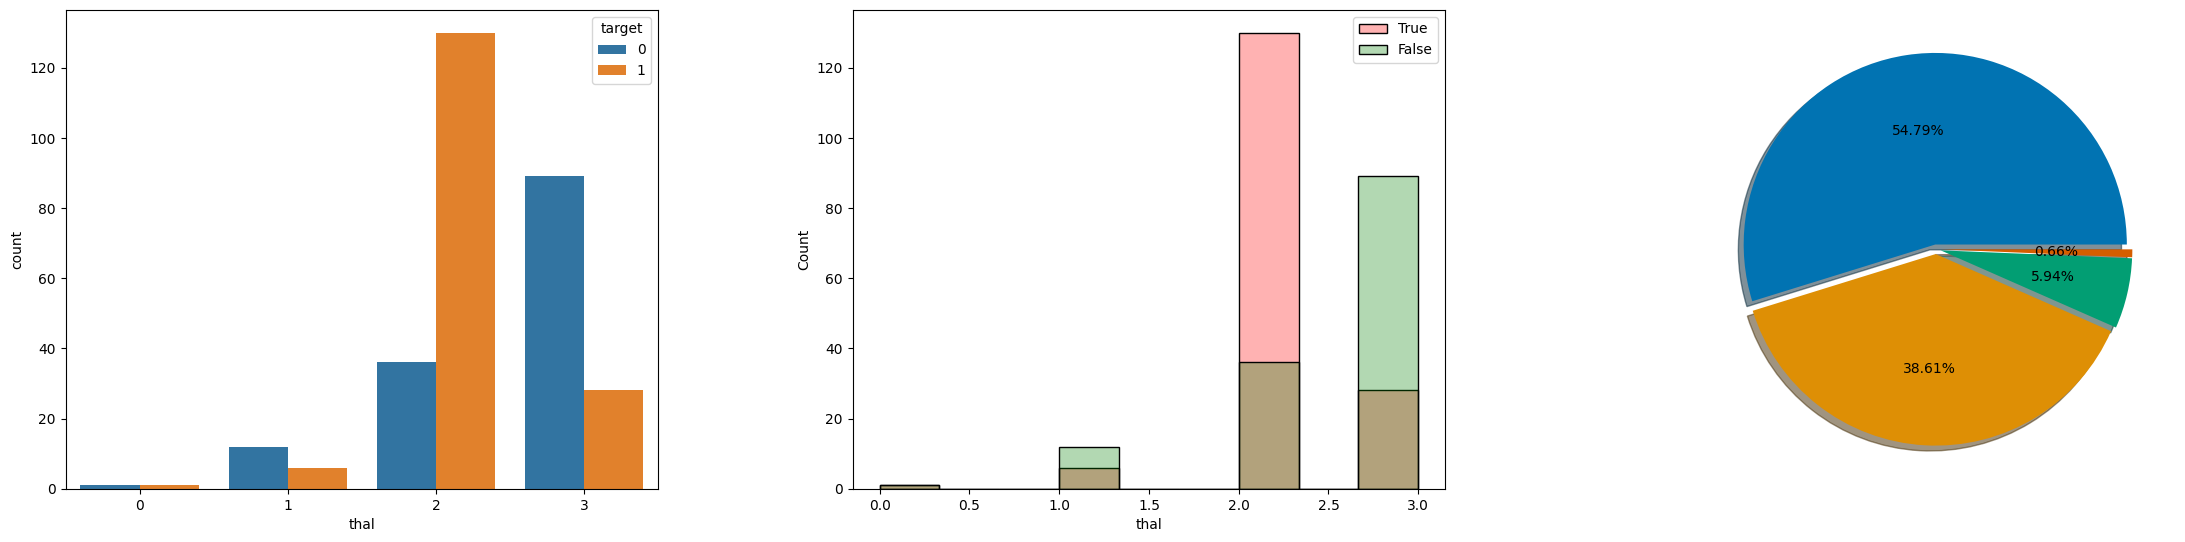

In [19]:
plt.figure(figsize=(25,8))
plt.subplot(131,)
sns.countplot(x=hc_df.thal,hue=hc_df.target)
plt.subplot(132)
sns.histplot(x=cvd_true.thal,color='red',alpha=0.3,label='True')
sns.histplot(x=cvd_false.thal,color='green',alpha=0.3,label='False')
plt.legend()
plt.subplot(133)
plt.pie(x=hc_df.thal.value_counts(),shadow = True,explode = [0.025]*4,colors=sns.color_palette("colorblind"), autopct = '%0.2f%%');
plt.tight_layout(pad=10)
cvd_true.thal.value_counts()

## As per the above Charts Looks like thalassemia, is a significant factor in CVD patients. as it is seen in more number in 2(reversable_defect) has the highest cases of 130

## List how the other factors determine the occurrence of CVD

#### A. Resting_ecg

restecg
1    152
0    147
2      4
Name: count, dtype: int64

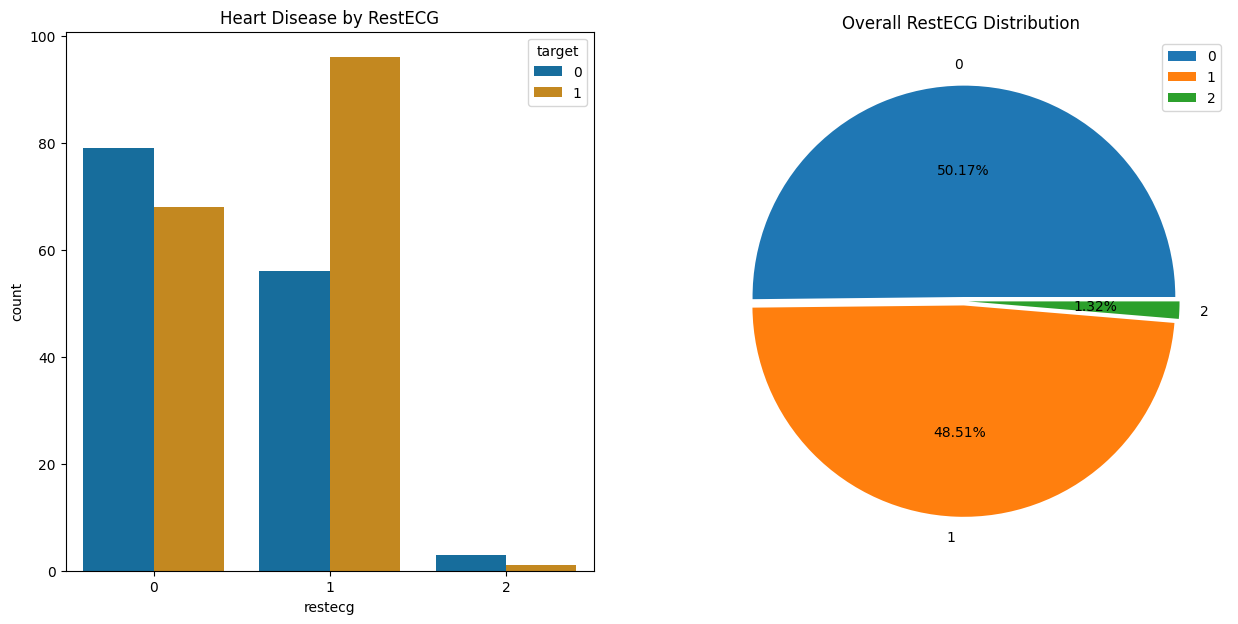

In [20]:
f,axes = plt.subplots(1,2,figsize=(15,7))
axes[0].set_title("Heart Disease by RestECG")
sns.countplot(x=hc_df.restecg,hue=hc_df.target,palette='colorblind',ax=axes[0]);
axes[1].set_title("Overall RestECG Distribution ")
plt.pie(x=hc_df.restecg.value_counts(),autopct='%.2f%%',explode=[0.020]*3,labels=[0,1,2]);
plt.legend()
hc_df.restecg.value_counts()

#### B. Fasting Blood Sugar

fbs
0    258
1     45
Name: count, dtype: int64

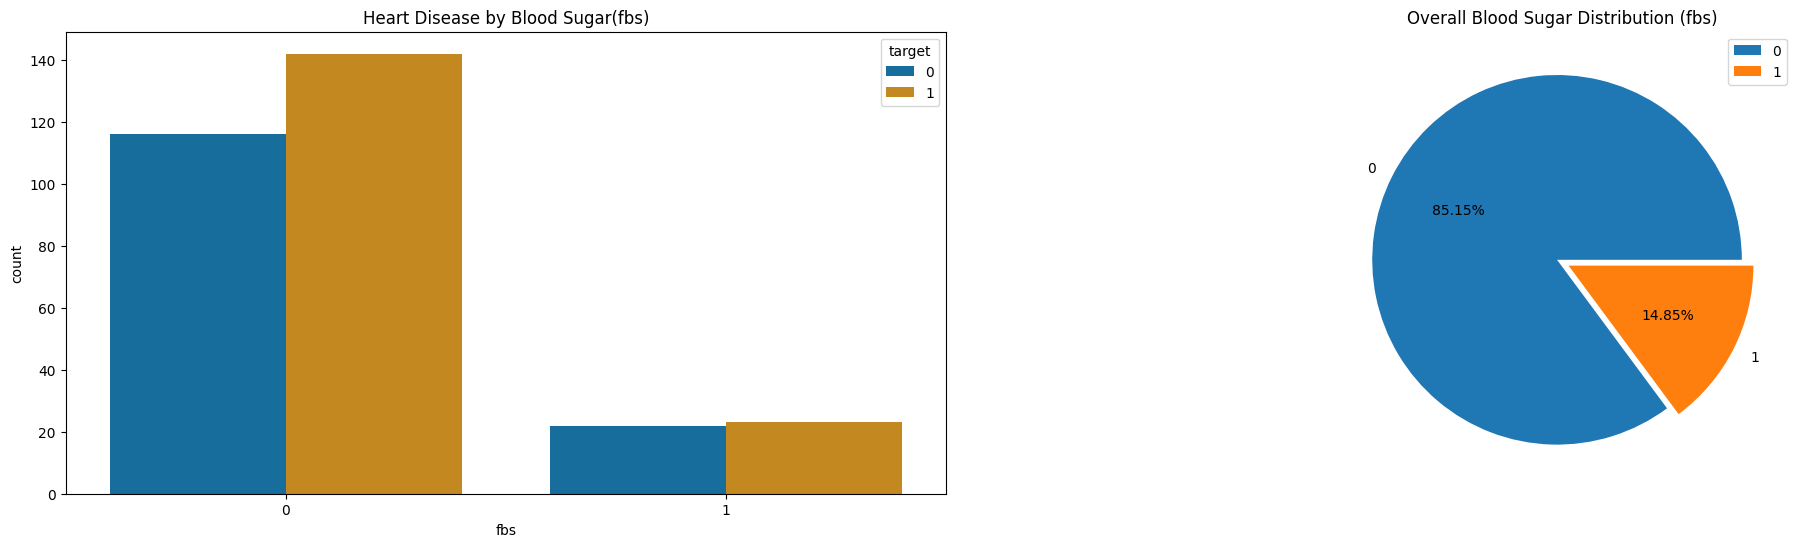

In [21]:
f,axes=plt.subplots(1,2,figsize=(25,6))
axes[0].set_title("Heart Disease by Blood Sugar(fbs)")
sns.countplot(x=hc_df.fbs,hue=hc_df.target,palette='colorblind',ax=axes[0]);
axes[1].set_title("Overall Blood Sugar Distribution (fbs)")
plt.pie(x=hc_df.fbs.value_counts(),autopct='%.2f%%',explode=[0.035]*2,labels=[0,1]);
plt.legend()
hc_df.fbs.value_counts()

## Use a pair plot to understand the relationship between all the given variables

<Figure size 3500x3000 with 0 Axes>

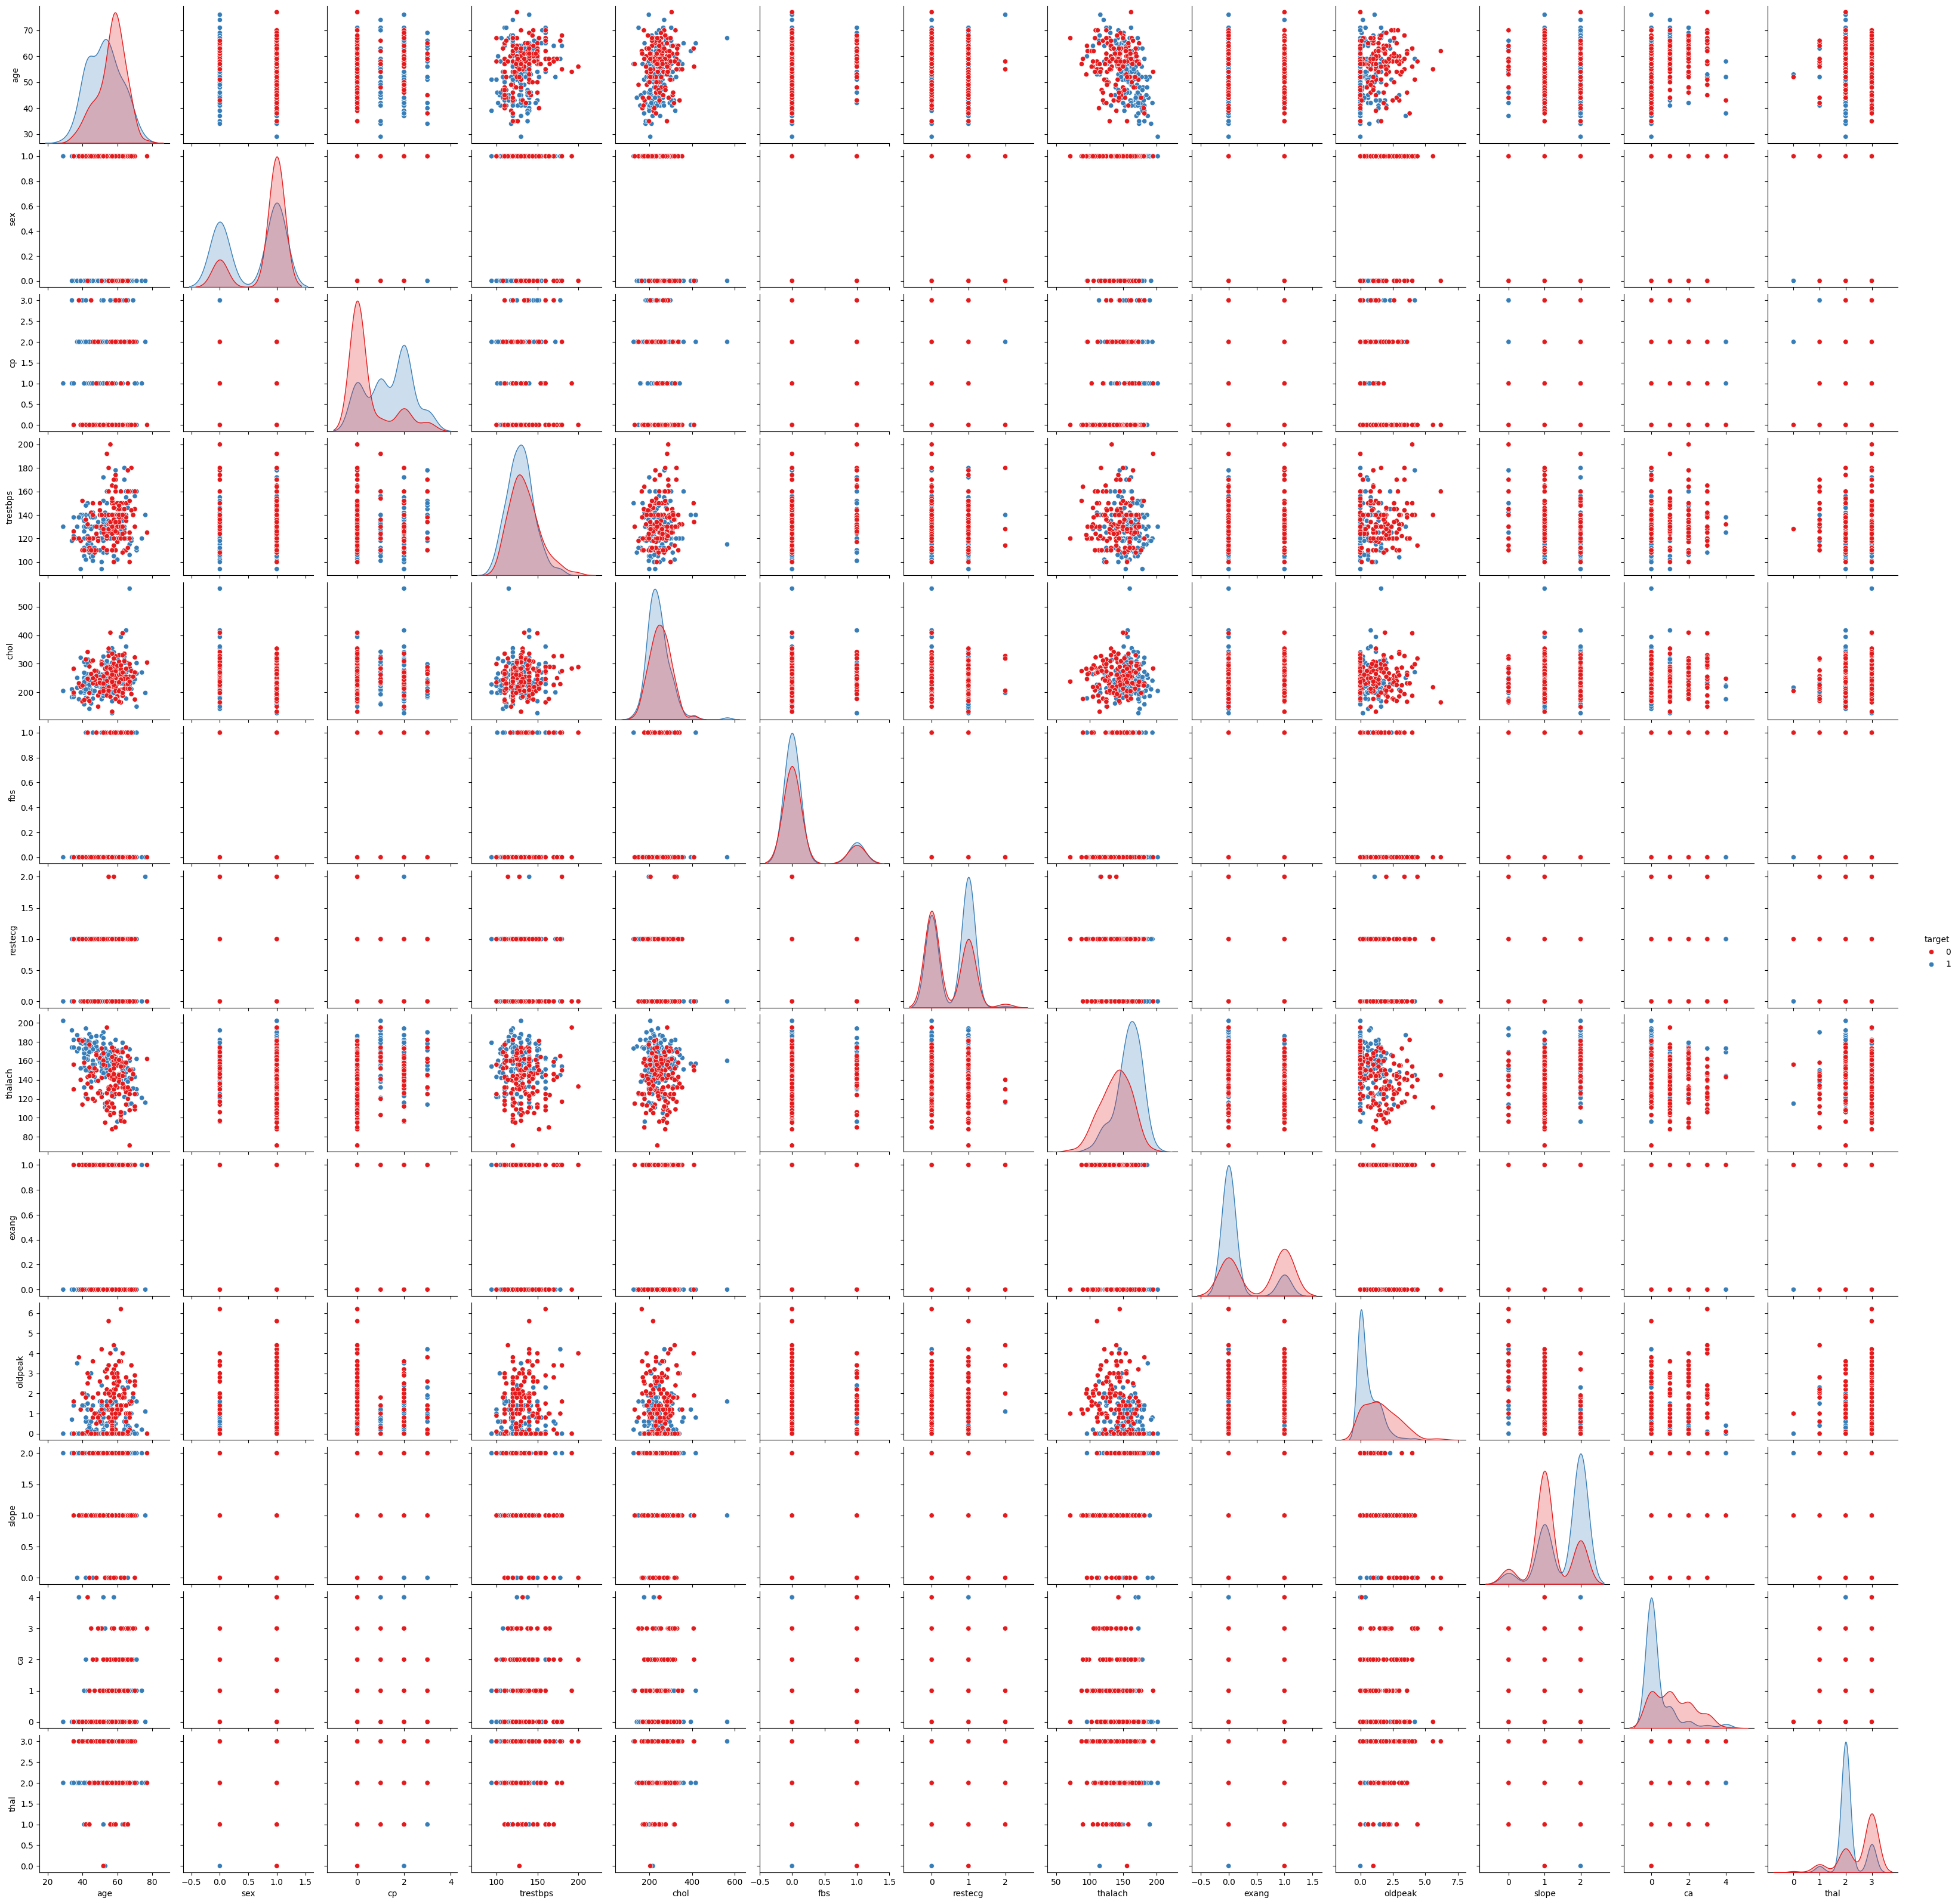

<Figure size 3500x3000 with 0 Axes>

In [22]:
sns.pairplot(data=hc_df,hue='target',palette='Set1')
plt.figure(figsize=(35,30))

## Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [23]:
#importing neccessery library
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [24]:
X=hc_df.iloc[:,:-1]
y=hc_df.iloc[:,-1:]

In [25]:
# Training & Testing
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.3)
print("X train:{}".format(X_train.shape))
print("X test:{}".format(X_test.shape))
print("y train:{}".format(y_train.shape))
print("y test:{}".format(y_test.shape))

X train:(212, 13)
X test:(91, 13)
y train:(212, 1)
y test:(91, 1)


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logrel_mod = LogisticRegression().fit(X_train,y_train)
type(logrel_mod)

sklearn.linear_model._logistic.LogisticRegression

Accuracy on Train Set: 86.79245283018868
Accuracy on Test Set: 82.41758241758241
Precision score 80.32786885245902
Recall score 92.45283018867924
f1 score 85.96491228070175
CV Scores [0.87096774 0.80645161 0.83870968 0.9        0.9        0.86666667
 0.83333333 0.86666667 0.7        0.73333333]
Average CV Score 0.8316129032258065


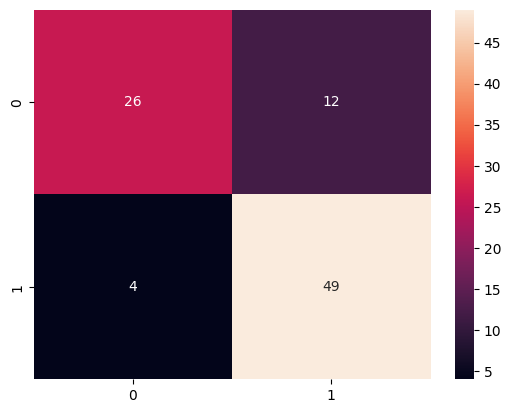

In [28]:
x_test_pred=logrel_mod.predict(X_test)
x_train_pred=logrel_mod.predict(X_train)

# Checking various types of score 
print("Accuracy on Train Set:",accuracy_score(y_train,x_train_pred)*100)
print("Accuracy on Test Set:",accuracy_score(y_test,x_test_pred)*100)
print("Precision score",precision_score(y_test,x_test_pred)*100)
print("Recall score",recall_score(y_test,x_test_pred)*100)
print("f1 score",f1_score(y_test,x_test_pred)*100)

#Checking the predictions    
cm= confusion_matrix(y_test,x_test_pred)
sns.heatmap(cm,annot=True);

# Checking cross value score
cv_score = cross_val_score(logrel_mod,X,y,cv=10)
print("CV Scores",cv_score)
print("Average CV Score",cv_score.mean())

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc_mod = RandomForestClassifier(random_state=4,n_estimators=100)
type(rfc_mod)

sklearn.ensemble._forest.RandomForestClassifier

In [30]:
rfc_mod.fit(X_train,y_train)

RandomForestClassifier(random_state=4)

In [31]:
y_test_pred_rfc = rfc_mod.predict(X_test)
y_train_pred_rfc = rfc_mod.predict(X_train)

Accuracy on Train Set: 100.0
Accuracy on Test Set & Accuracy Score:  82.41758241758241
Precision score 82.45614035087719
Recall score 88.67924528301887
f1 score 85.45454545454547
CV Scores [0.90322581 0.80645161 0.90322581 0.9        0.86666667 0.8
 0.8        0.83333333 0.73333333 0.8       ]
Average CV Score 0.8346236559139785


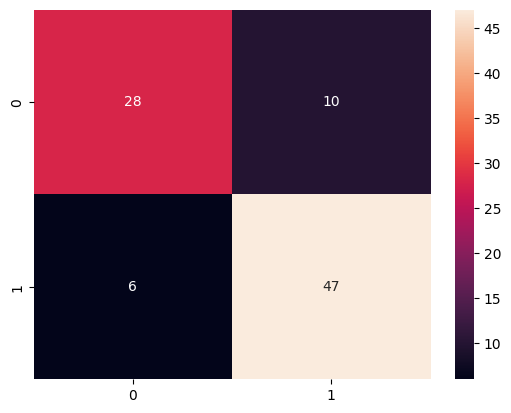

In [32]:
print("Accuracy on Train Set:",accuracy_score(y_train,y_train_pred_rfc)*100)
print("Accuracy on Test Set & Accuracy Score: ",accuracy_score(y_test,y_test_pred_rfc)*100)
print("Precision score",precision_score(y_test,y_test_pred_rfc)*100)
print("Recall score",recall_score(y_test,y_test_pred_rfc)*100)
print("f1 score",f1_score(y_test,y_test_pred_rfc)*100)

#16 prediction were wrong against 91 
cnf_rf= confusion_matrix(y_test,y_test_pred_rfc)
sns.heatmap(cnf_rf,annot=True)


cv_score_rf = cross_val_score(rfc_mod,X,y,cv=10)
print("CV Scores",cv_score_rf)
print("Average CV Score",cv_score_rf.mean())

<Axes: >

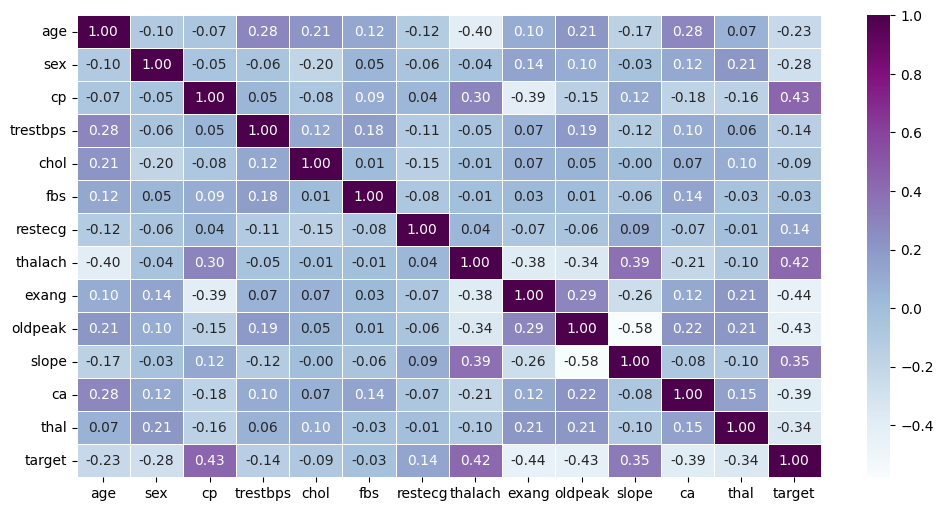

In [33]:
# Using Correlation for Feature Selection
plt.figure(figsize=(12,6))
sns.heatmap(hc_df.corr(),annot=True,fmt='.2f',linewidths=0.5,cmap="BuPu")

In [34]:
new_features = ['sex','cp','thalach','oldpeak','ca','thal','chol','slope']
df2=hc_df[new_features]
df2

,sex,cp,thalach,oldpeak,ca,thal,chol,slope
0,1,3,150,2.3,0,1,233,0
1,1,2,187,3.5,0,2,250,0
2,0,1,172,1.4,0,2,204,2
3,1,1,178,0.8,0,2,236,2
4,0,0,163,0.6,0,2,354,2
...,...,...,...,...,...,...,...,...
298,0,0,123,0.2,0,3,241,1
299,1,3,132,1.2,0,3,264,1
300,1,0,141,3.4,2,3,193,1
301,1,0,115,1.2,1,3,131,1


In [35]:
X_new = df2.iloc[:,:-1]
X_new.shape

(303, 7)

In [36]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_new,y,test_size=0.3,random_state=4)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',Y1_train.shape)
print('y1_test :',Y1_test.shape)

X1_train: (212, 7)
X1_test : (91, 7)
y1_train: (212, 1)
y1_test : (91, 1)


In [37]:
import statsmodels.api as sm

In [38]:
logreg_stas_mod=sm.Logit(Y1_train,X1_train).fit()
type(logreg_stas_mod)

Optimization terminated successfully.
         Current function value: 0.356714
         Iterations 7


statsmodels.discrete.discrete_model.BinaryResultsWrapper

In [39]:
logreg_stas_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.4842
Time:                        19:19:47   Log-Likelihood:                -75.623
converged:                       True   LL-Null:                       -146.61
Covariance Type:            nonrobust   LLR p-value:                 3.851e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.6814      0.496     -3.390      0.001      -2.653      -0.709
cp             0.7858      0.211      3.721      0.000       0.372       1.200
thalach        0.0345      0.008      4.518      0.000       0.020       0.049
oldpeak       -0.9284      0.229     -4.054      0.000      -1.377      -0.480
ca            -0.7730      0.207     -3.734      0.000      -1.179      -0.367
thal          -1.0010      0.331     -3.027      0.002      -1.649      -0.353
chol          -0.0033      0.004     -0.949      0.343      -0.010       0.004
==============================================================================
"""

Accuracy Score 83.51648351648352
Precision score 82.75862068965517
Recall score 90.56603773584906
f1 score 86.48648648648648


<Axes: >

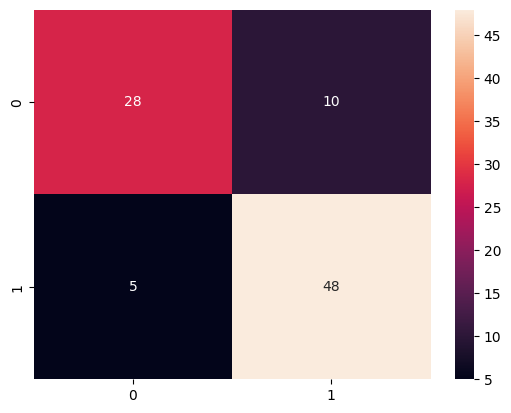

In [40]:
# After New feature are added metrics score are calculated
Y_pred_stats=logreg_stas_mod.predict(X1_test)
preds1 = list(map(round, Y_pred_stats))
print("Accuracy Score",accuracy_score(Y1_test,preds1)*100)
print("Precision score",precision_score(Y1_test,preds1)*100)
print("Recall score",recall_score(Y1_test,preds1)*100)
print("f1 score",f1_score(Y1_test,preds1)*100)

# 15 predication were wrong against 91
cnf_rf= confusion_matrix(Y1_test,preds1)
sns.heatmap(cnf_rf,annot=True)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(Y1_test,Y_pred_stats)

0.13524873532382764

In [43]:
# Testing Random Forest cross value score on new Xvalue(new feature column)
rfc1 = RandomForestClassifier(random_state=4)
cv_score1 = cross_val_score(rfc1,X_new, y, cv=10)
print(cv_score1)
print('\nAverage score: ',cv_score1.mean())

[0.87096774 0.80645161 0.87096774 0.86666667 0.83333333 0.76666667
 0.76666667 0.9        0.7        0.83333333]

Average score:  0.821505376344086
